## Q3: ¿Cómo se aplica la Tercera Ley de Kepler a diferentes tipos de sistemas extrasolares?  
1.- En las actividades 1 y 2 estudiamos sistemas extrasolares de una estrella utilizando las leyes de Kepler y Gravitación universal. En esta ocasión, utilizaremos dos sistemas binarios y aplicaremos la Tercera Ley de Kepler ¿Crees que estas leyes son válidas para estos sistemas? Justifica tu respuesta.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

file_bin = open("datos_planetas_binarios.txt","r")
lin_bin = file_bin.readlines()
file_bin.close()
head = lin_bin[0].split()
salto = lin_bin[1:]
datosq3 = [linea.strip() for linea in salto]
print(head)
print(datosq3)
###########################

exoplaneta = []
periodo_orbital_años = []
semieje = []
for i in datosq3:
    exoplaneta.append(i.split()[0])
    periodo_orbital_años.append(float(i.split()[1]))
    semieje.append(float(i.split()[2]))


['Exoplaneta', 'Periodo(aÃ±os)', 'Semieje_(UA)']
['NN_Ser_(AB)_c      15.49          5.39', 'NN_Ser_(AB)_d      7.65           3.36', 'Kepler-47_(AB)_b   0.14           0.30', 'Kepler-47_(AB)_c   0.83           0.99', 'Kepler-47_(AB)_d   0.51           0.70']


In [2]:
import pandas as pd
from IPython.display import display

df = pd.DataFrame({"Exoplaneta": exoplaneta,
                   "Periodo (años)": periodo_orbital_años,
                   "Semieje (AU)": semieje})

display(df)


,Exoplaneta,Periodo (años),Semieje (AU)
0,NN_Ser_(AB)_c,15.49,5.39
1,NN_Ser_(AB)_d,7.65,3.36
2,Kepler-47_(AB)_b,0.14,0.30
3,Kepler-47_(AB)_c,0.83,0.99
4,Kepler-47_(AB)_d,0.51,0.70


2.- Obtén el valor de la pendiente de la gráfica obtenida para los sistemas de NN SER (AB) y Kepler-47. Rellene los datos obtenidos en la siguiente tabla. 

In [3]:
import pandas as pd
from IPython.display import display

df3 = pd.DataFrame({"Nombre planeta": ["NN Ser (AB)","Kepler-47"],
                   "Pendiente": 0})
display(df3)

,Nombre planeta,Pendiente
0,NN Ser (AB),0
1,Kepler-47,0


## Cálculo de pendientes
### NN Ser (AB) :



In [4]:
from a3_t2 import Calculadora_Kepler
NNSerAB_periodo = []
NNSerAB_periodo += periodo_orbital_años[0:2]
print(NNSerAB_periodo,"\n")
NNSerAB_periodo = np.array(NNSerAB_periodo,)


NNSerAB_distancia = []
NNSerAB_distancia +=semieje[0:2]
print(NNSerAB_distancia,"\n")
Kepler_47_distancia = np.array(NNSerAB_distancia)


T_2, A_3, K_inv = Calculadora_Kepler(NNSerAB_distancia,NNSerAB_periodo)


[15.49, 7.65] 

[5.39, 3.36] 

El periodo al cuadrado es: 
[239.9401, 58.52250000000001]

la distancia al cubo es:
 [156.59081899999998, 37.93305599999999]

Las constantes individuales son: 
[6.248905382062025e-05, 0.0010721841277744509]



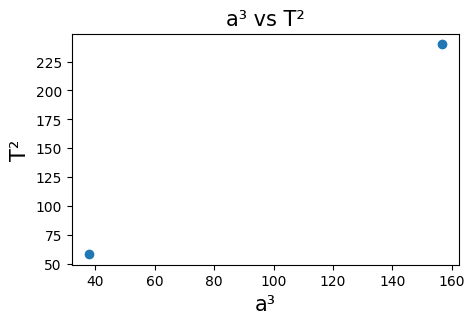

In [5]:
################################
#           Gráfico            #
################################

plt.figure(figsize=(5, 3))
plt.scatter(A_3, T_2)
plt.title("a³ vs T²", fontsize=15)
plt.xlabel("a³", fontsize=15)
plt.ylabel("T²", fontsize=15)
plt.show()

In [6]:
from Calcular_Pendiente import *

m,m2 = pendiente(A_3, T_2)

Pendiente (m): 1.528914715845436
Intercepto (b): 0.5260924646110596
Incertidumbre de la pendiente (Δm): inf


d:\Users\Usach\Documents\7\DatosFis2_Exo\Calcular_Pendiente.py:25: RuntimeWarning: divide by zero encountered in double_scalars
  inc_m = np.sqrt(np.sum(d**2) / (D * (n - 2)))  # Usando estrictamente la fórmula de la segunda imagen


### Kepler-47

In [7]:
Kepler_47_periodo = []
Kepler_47_periodo += periodo_orbital_años[2:]
print(Kepler_47_periodo,"\n")
Kepler_47_periodo = np.array(Kepler_47_periodo)


Kepler_47_distancia = []
Kepler_47_distancia += semieje[2:]
print(Kepler_47_distancia,"\n")
Kepler_47_distancia = np.array(Kepler_47_distancia)

T_2_K, A_3_K, K_inv_K = Calculadora_Kepler(Kepler_47_distancia,Kepler_47_periodo)

[0.14, 0.83, 0.51] 

[0.3, 0.99, 0.7] 

El periodo al cuadrado es: 
[0.019600000000000003, 0.6889, 0.2601]

la distancia al cubo es:
 [0.026999999999999996, 0.970299, 0.3429999999999999]

Las constantes individuales son: 
[995.7831631357014, 0.754118219330431, 6.445520471069666]



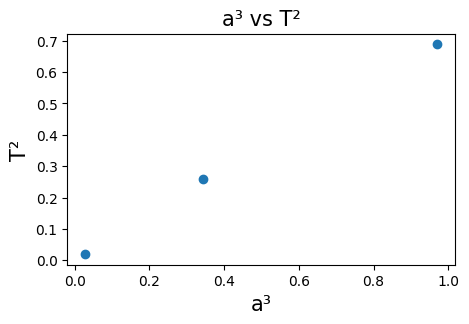

In [8]:
################################
#           Gráfico            #
################################

plt.figure(figsize=(5, 3))
plt.scatter(A_3_K, T_2_K)
plt.title("a³ vs T²", fontsize=15)
plt.xlabel("a³", fontsize=15)
plt.ylabel("T²", fontsize=15)
plt.show()

In [9]:
m_k, m_k2 = pendiente(A_3_K, T_2_K)

Pendiente (m): 0.7058652854784002
Intercepto (b): 0.007509821246195277
Incertidumbre de la pendiente (Δm): 0.019240025322865676


### Actualizar la tabla

In [10]:
pendientes = [m,f"{m_k} +- {m_k2}"]

In [11]:
df3 = pd.DataFrame({"Nombre planeta": ["NN Ser (AB)","Kepler-47"],
                   "Pendiente":pendientes})
display(df3)

,Nombre planeta,Pendiente
0,NN Ser (AB),1.528915
1,Kepler-47,0.7058652854784002 +- 0.019240025322865676
